### Single Nucleus

#### HTAPP-895-SMP-7359

In [1]:
# Set paths to data and result #todo path/to/results
path_to_data <- "path/to/data/"
path_to_results <- "path/to/results/"

In [2]:
libraries <- c("ggplot2", "Seurat", "glue", "dplyr", "anndata", 
               "data.table", "Matrix", "mltools", "enrichR", "R.utils")
lapply(libraries, function(x) suppressMessages(require(x, character.only = TRUE,quietly=TRUE,warn.conflicts = FALSE)))

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

In [3]:
sample <- "HTAPP-895-SMP-7359"

In [4]:
# Assumes you're working in the repository root directory
source("code/utils.R")

In [5]:
#library(reticulate)
#use_condaenv(condaenv = "SlideCNA_env") #if error, set conda environment manually for reticulate
sn_adata <- read_h5ad(paste0(path_to_data, sample, "_scRNAseq_processed.h5ad"))

In [6]:
# Reformat counts

In [7]:
counts <- get_adata_counts(sn_adata)
colnames(counts) <- sub(glue('^{sample}-TST-channel1_'), '', colnames(counts))

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.9 GiB”


In [8]:
head(counts)

,AACCAACGTAATGCTC-1,GATCAGTTCTTACCGC-1,TGGTACAGTATGCTTG-1,CATGCTCCACGACCTG-1,CACGAATAGGTAATCA-1,TATGTTCTCACCTCAC-1,TAAGCCATCCTAGCCT-1,GGAAGTGTCGCTAAAC-1,CTGCCTACAGTAACAA-1,ATGAGGGCACACGTGC-1,⋯,HTAPP-895-SMP-7359-TST-channel2_TGGTAGTGTTCCTTGC-1,HTAPP-895-SMP-7359-TST-channel2_CGATCGGAGTATGGAT-1,HTAPP-895-SMP-7359-TST-channel2_GTTGTCCGTGGAATGC-1,HTAPP-895-SMP-7359-TST-channel2_ACTATTCAGCGCTGCT-1,HTAPP-895-SMP-7359-TST-channel2_TACCCACGTTCTTCAT-1,HTAPP-895-SMP-7359-TST-channel2_AGCGCCACAAACACCT-1,HTAPP-895-SMP-7359-TST-channel2_TTCACCGCAGCCGTTG-1,HTAPP-895-SMP-7359-TST-channel2_GACACGCCATCTCATT-1,HTAPP-895-SMP-7359-TST-channel2_ACGTACATCTGTTCAT-1,HTAPP-895-SMP-7359-TST-channel2_GTTATGGCAGTATGAA-1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MIR1302-2HG,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AL627309.1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AC114498.1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AL669831.5,2,1,2,1,1,2,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
FAM87B,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LINC00115,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [9]:
counts_mat <- counts %>% as.data.table() %>% sparsify()
counts_mat <- counts_mat[,colSums(counts_mat)>300] # filter for cells with over 300 counts across all genes
row.names(counts_mat) <- row.names(counts)

In [10]:
counts_mat[1:5,1:5]

5 x 5 sparse Matrix of class "dgCMatrix"
            AACCAACGTAATGCTC-1 GATCAGTTCTTACCGC-1 TGGTACAGTATGCTTG-1
MIR1302-2HG                  .                  .                  .
AL627309.1                   .                  .                  .
AC114498.1                   .                  .                  .
AL669831.5                   2                  1                  2
FAM87B                       .                  .                  .
            CATGCTCCACGACCTG-1 CACGAATAGGTAATCA-1
MIR1302-2HG                  .                  .
AL627309.1                   .                  .
AC114498.1                   .                  .
AL669831.5                   1                  1
FAM87B                       .                  .

In [11]:
# Reformat beads metadata
beads_df <- sn_adata$obs
row.names(beads_df) <- sub(glue('^{sample}-TST-channel1_'), '', row.names(beads_df))
beads_df$bc <- row.names(beads_df)

#### Create a Seurat Object from single-cell/single-nucleus data

In [12]:
sn=make_seurat_annot(counts_mat, beads_df)

Regressing out nCount_RNA, percent.mito

Centering and scaling data matrix

PC_ 1 
Positive:  COL4A2, COL4A1, IGFBP7, LAMA4, CALD1, SPARC, LDB2, NRP1, FN1, MSRB3 
	   CACNA1C, ADGRF5, NXN, NOX4, RBMS3, ERG, LAMB1, KALRN, ADGRL2, GLIS3 
	   DCLK2, TIMP3, UACA, CHSY3, COL15A1, NID1, PTPRE, ADAMTS9-AS2, ZNF521, HMCN1 
Negative:  KRT19, ADCY1, TFF1, RPLP0, ESRP1, IGFBP4, COX6C, TFF3, ADIRF, CHPT1 
	   LINC00536, TMBIM6, MAL2, RPLP1, AC013652.1, SHANK2, ZNF552, CA8, PPM1E, PLEKHA7 
	   MGP, DSP, AGBL4, SLC9A3R1, SET, RPS2, MPPED2, S100A6, HIST1H2AC, LDHA 
PC_ 2 
Positive:  MSR1, TFEC, GPNMB, FPR3, NPL, DOCK8, SLCO2B1, MARCH1, AC074327.1, COLEC12 
	   FMNL2, SLC1A3, PIK3AP1, ABCA1, ST18, ALOX5, ABR, SYK, APBB1IP, IL18 
	   CHST11, TMEM51, RASSF4, ITGAX, SIGLEC1, DAPK1, DOCK2, SLC11A1, SLC8A1, KCNE1 
Negative:  PTPRG, TEAD1, FBXL7, CALD1, COL4A2, PARD3, ANTXR1, DLC1, PRKG1, PARVA 
	   COL4A1, MSRB3, CACNA1C, SOX5, IGFBP7, IGFBP4, TIMP3, PALLD, PDZRN3, NXN 
	   NOX4, ZFPM2, LAMB1, PLOD2, COL3A

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 9958
Number of edges: 306834

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8661
Number of communities: 16
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
22:17:39 UMAP embedding parameters a = 0.9922 b = 1.112

22:17:39 Read 9958 rows and found 10 numeric columns

22:17:39 Using Annoy for neighbor search, n_neighbors = 30

22:17:39 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:17:40 Writing NN index file to temp file /tmp/RtmpP1lQmi/file3f3a8e16e90e7a

22:17:40 Searching Annoy index using 1 thread, search_k = 3000

22:17:43 Annoy recall = 100%

22:17:43 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors

In [13]:
# Annotate beads as Malignant or Normal
sn@meta.data$cluster_type <- 'Malignant'
sn@meta.data[sn@meta.data$cell_type!='MBC',]$cluster_type <- 'Normal' # MBC = metastatic breast cancer
table(sn@meta.data$cell_type)
# unorder cell types
class(sn@meta.data$cell_type) <- setdiff(class(sn@meta.data$cell_type), "ordered")


                   MBC   Endothelial_vascular             Fibroblast 
                  6913                    230                    201 
Smooth muscle_vascular             Macrophage               B_plasma 
                    52                    851                    844 
                     B                      T                     NK 
                    11                    841                     15 

In [14]:
md=as.data.table(sn@meta.data)
rownames(md) <- md$bc

In [15]:
# outputting single nucleus results
save(sn, file=file.path(path_to_results, "sn.Robj"))
save(md, file=file.path(path_to_results, "md.Robj"))

In [16]:
load(file=file.path(path_to_results, "sn.Robj"))
load(file=file.path(path_to_results, "md.Robj"))

In [17]:
# TSNE Plots

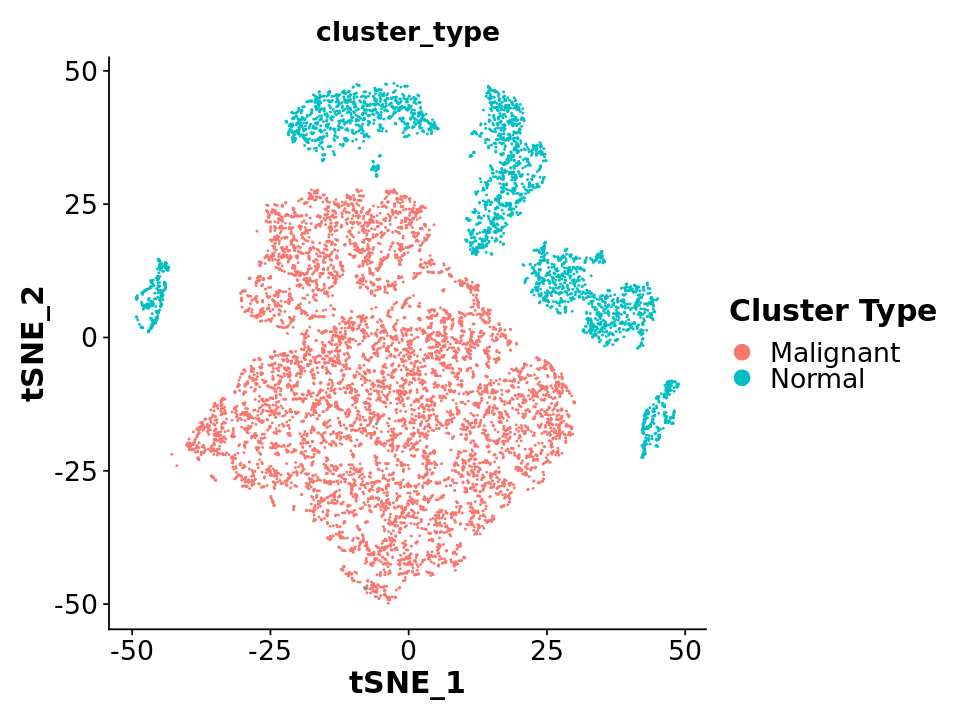

In [18]:
legend_title = "Cluster Type"
options(repr.plot.width = 8, repr.plot.height =6)
TSNEPlot(sn, label.size = 18, group.by="cluster_type") +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

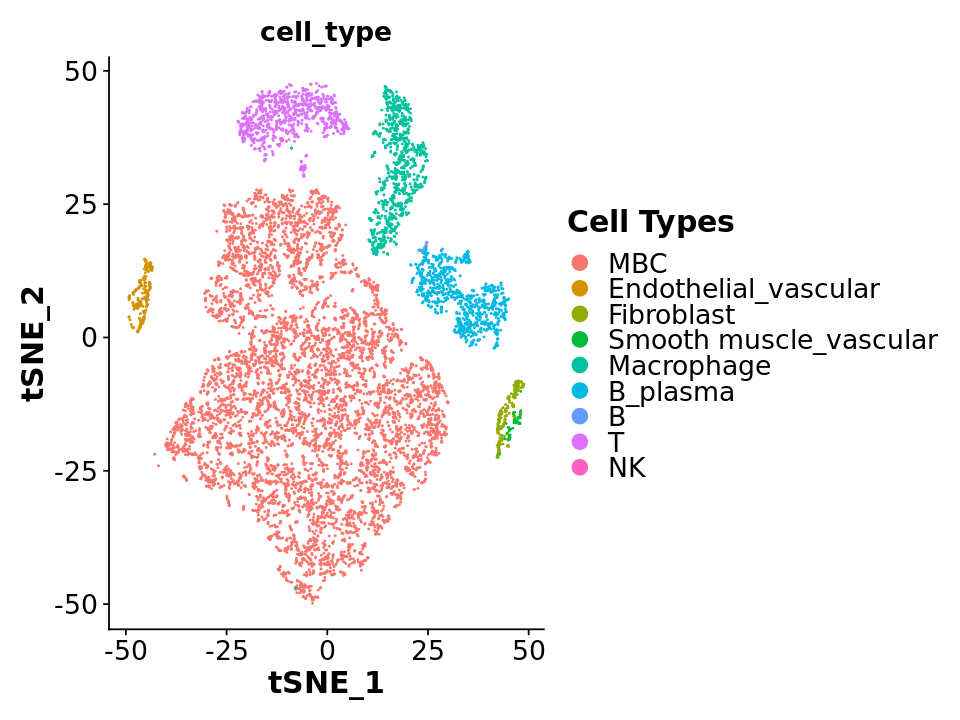

In [19]:
legend_title = "Cell Types"
options(repr.plot.width = 8, repr.plot.height =6)
TSNEPlot(sn, label.size = 18, group.by="cell_type") +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

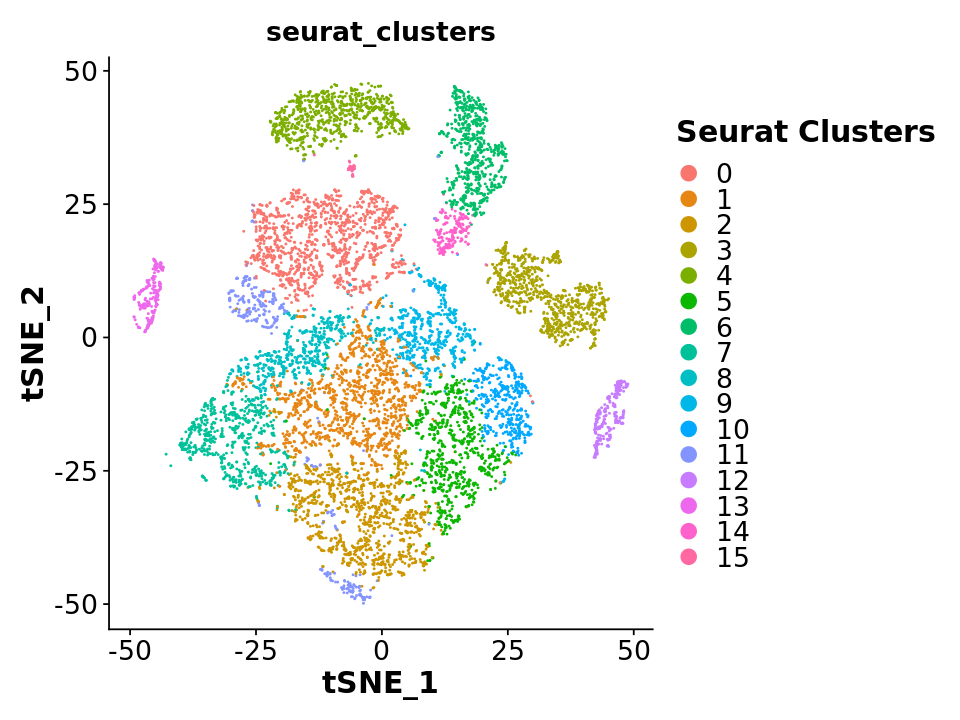

In [20]:
legend_title = "Seurat Clusters"
TSNEPlot(sn, label.size = 18, group.by="seurat_clusters") +
    theme(axis.text=element_text(size=text_size), axis.title=element_text(size=title_size, face='bold'),
          legend.title=element_text(size=title_size, face='bold'), legend.text=element_text(size=text_size)) +
    labs(color = legend_title) +
    guides(color = guide_legend(override.aes = list(size = legend_size_pt)))

#### Cell Type Markers

In [21]:
sn <- SetIdent(sn,value = sn@meta.data$cell_type)
markers <- FindAllMarkers(sn,max.cells.per.ident = 500,random.seed = 1234)

Calculating cluster MBC

For a more efficient implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the limma package
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('limma')
--------------------------------------------
After installation of limma, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session

Calculating cluster Endothelial_vascular

Calculating cluster Fibroblast

Calculating cluster Smooth muscle_vascular

Calculating cluster Macrophage

Calculating cluster B_plasma

Calculating cluster B

Calculating cluster T

Calculating cluster NK



In [22]:
markers <- markers %>% as.data.table()

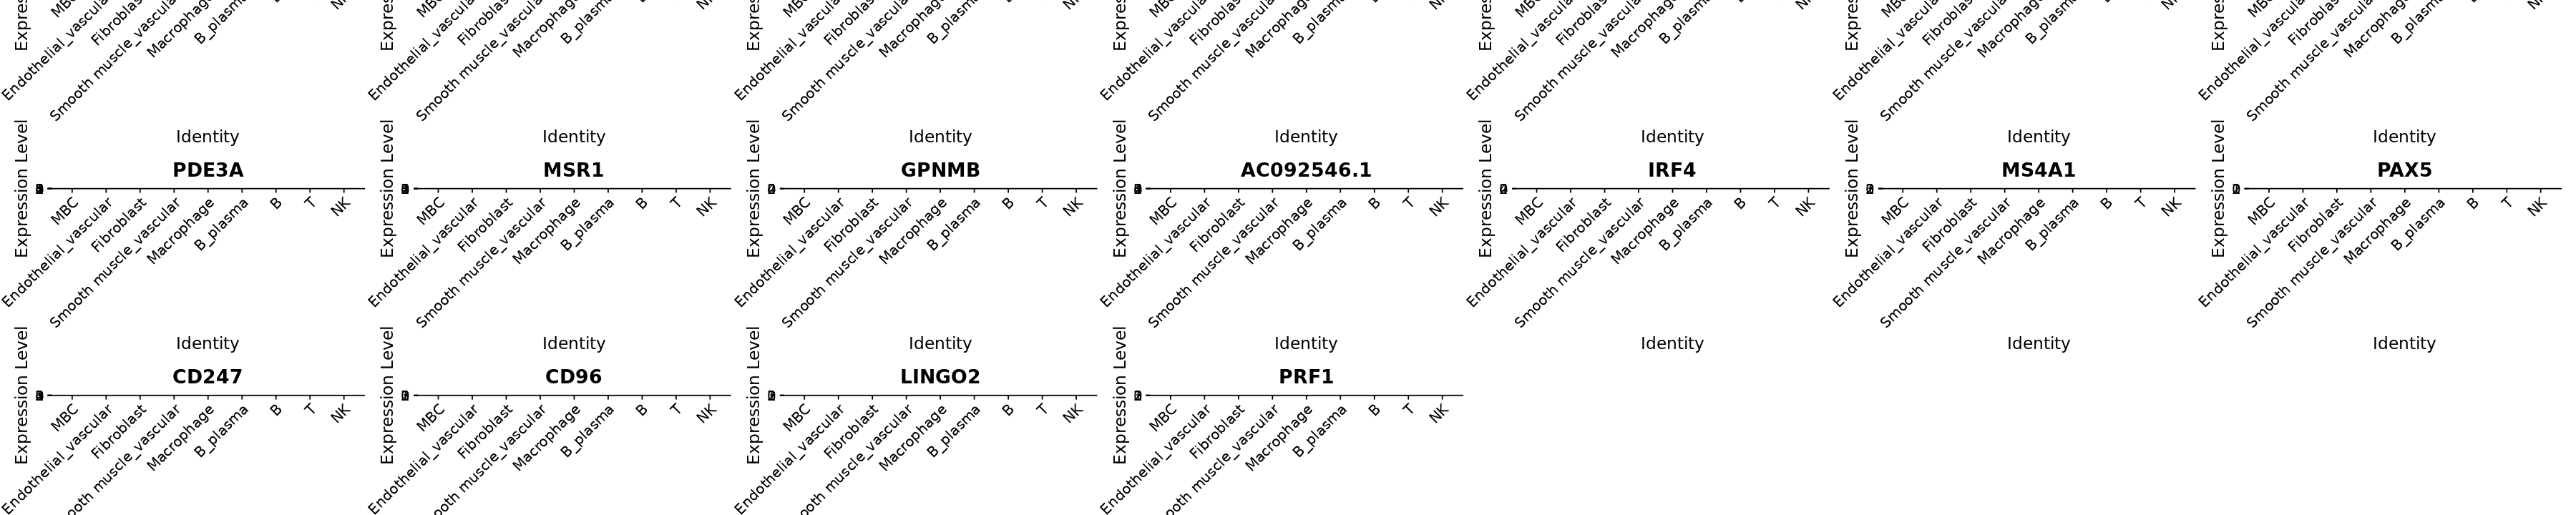

In [23]:
options(repr.plot.width = 30, repr.plot.height =6)
VlnPlot(sn,features = markers[pct.2<0.04,.SD[1:2],by="cluster"]$gene,group.by = "cell_type",ncol = 7,pt.size = 0)

In [24]:
save(markers, file=file.path(path_to_results, "markers.Robj"))

In [25]:
head(markers)

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
3.205819e-183,3.315140,0.988,0.021,8.150473e-179,MBC,PRLR
4.554283e-183,6.129776,0.995,0.039,1.157881e-178,MBC,AFF3
2.235159e-181,4.055812,0.983,0.016,5.682669e-177,MBC,ANKS1B
4.289059e-180,4.341707,0.980,0.016,1.090450e-175,MBC,ANKRD30A
3.479754e-179,3.563797,0.999,0.076,8.846926e-175,MBC,KRT19
8.201916e-179,2.772970,0.969,0.016,2.085255e-174,MBC,ADCY1


#### Seurat Cluster Markers

In [26]:
sn=SetIdent(sn,value = sn@meta.data$seurat_clusters)
seurat_markers=FindAllMarkers(sn)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15



In [27]:
seurat_markers=as.data.table(seurat_markers)

In [28]:
save(seurat_markers, file=file.path(path_to_results, "seurat_markers.Robj"))

In [29]:
load(file=file.path(path_to_results, "seurat_markers.Robj"))

In [30]:
seurat_markers[order(avg_log2FC,decreasing=TRUE),.SD[1:2,],by="cluster"]

cluster,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,gene
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3,0.000000e+00,6.6573121,0.981,0.165,0.000000e+00,IGKC
3,0.000000e+00,6.3004981,0.980,0.250,0.000000e+00,IGHG3
13,1.718310e-209,5.8524866,0.987,0.298,4.368631e-205,INSR
13,0.000000e+00,4.6467082,0.952,0.093,0.000000e+00,ADAMTS6
12,0.000000e+00,5.4728497,0.992,0.063,0.000000e+00,CALD1
12,0.000000e+00,5.0242440,0.924,0.012,0.000000e+00,COL6A3
6,0.000000e+00,4.5723878,0.998,0.133,0.000000e+00,PLXDC2
6,0.000000e+00,4.4224244,0.998,0.296,0.000000e+00,FMNL2
4,0.000000e+00,4.1565708,0.913,0.049,0.000000e+00,TOX


In [31]:
# Get gene ontology terms associated with each cluster

In [32]:
en_seurat=seurat_markers[order(avg_log2FC,decreasing=TRUE),run_enrichr(gene,50),by="cluster"]

Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  

In [33]:
en_seurat[GO_Biological_Process_2018.Adjusted.P.value<0.05][order(GO_Biological_Process_2018.Adjusted.P.value),.SD[1:3],by="cluster"]

cluster,GO_Biological_Process_2018.Term,GO_Biological_Process_2018.Overlap,GO_Biological_Process_2018.P.value,GO_Biological_Process_2018.Adjusted.P.value,GO_Biological_Process_2018.Old.P.value,GO_Biological_Process_2018.Old.Adjusted.P.value,GO_Biological_Process_2018.Odds.Ratio,GO_Biological_Process_2018.Combined.Score,GO_Biological_Process_2018.Genes
<fct>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>
9,SRP-dependent cotranslational protein targeting to membrane (GO:0006614),16/89,2.478492e-26,1.122757e-23,0,0,128.135375,7554.80560,RPL4;RPL41;RPLP1;RPLP0;RPL13A;RPL23A;RPS19;RPL14;RPL35;RPS20;RPS2;RPS11;RPS27A;RPL28;RPS24;RPL19
9,cotranslational protein targeting to membrane (GO:0006613),16/93,5.313378e-26,1.203480e-23,0,0,121.454545,7068.28832,RPL4;RPL41;RPLP1;RPLP0;RPL13A;RPL23A;RPS19;RPL14;RPL35;RPS20;RPS2;RPS11;RPS27A;RPL28;RPS24;RPL19
9,protein targeting to ER (GO:0045047),16/97,1.099494e-25,1.660235e-23,0,0,115.433551,6633.94051,RPL4;RPL41;RPLP1;RPLP0;RPL13A;RPL23A;RPS19;RPL14;RPL35;RPS20;RPS2;RPS11;RPS27A;RPL28;RPS24;RPL19
11,mitochondrial ATP synthesis coupled electron transport (GO:0042775),11/85,1.363244e-16,5.480242e-14,0,0,75.757450,2767.53283,MT-ND6;MT-ND4L;MT-ND4;MT-ND5;MT-CO1;MT-CO2;MT-CO3;MT-ND2;MT-CYB;MT-ND3;MT-ND1
11,respiratory electron transport chain (GO:0022904),11/94,4.341046e-16,8.725502e-14,0,0,67.512203,2388.12576,MT-ND6;MT-ND4L;MT-ND4;MT-ND5;MT-CO1;MT-CO2;MT-CO3;MT-ND2;MT-CYB;MT-ND3;MT-ND1
11,"mitochondrial electron transport, NADH to ubiquinone (GO:0006120)",7/46,1.957439e-11,2.622969e-09,0,0,83.110912,2049.24906,MT-ND6;MT-ND4L;MT-ND4;MT-ND5;MT-ND2;MT-ND3;MT-ND1
12,extracellular matrix organization (GO:0030198),14/229,2.905829e-16,1.479067e-13,0,0,35.696382,1277.02533,POSTN;ITGA1;FN1;COL1A1;VCAN;COL3A1;COL1A2;COL4A2;COL5A1;COL4A1;COL5A2;ITGA11;COL6A3;COL8A1
12,collagen fibril organization (GO:0030199),5/29,9.022909e-09,2.296330e-06,0,0,92.250000,1708.79278,COL1A1;COL3A1;COL1A2;COL5A1;COL5A2
12,protein complex subunit organization (GO:0071822),5/45,9.008593e-08,1.209357e-05,0,0,55.305556,897.19448,COL1A1;COL3A1;COL1A2;COL5A1;COL5A2


### Run SlideCNA

In [36]:
library(SlideCNA)

In [39]:
load(file=file.path(path_to_data, "gene_pos.Robj"))
load(file=file.path(path_to_results, "sn.Robj"))
load(file=file.path(path_to_results, "md.Robj"))

In [40]:
OUTPUT_DIRECTORY <- file.path(path_to_results, "SlideCNA")
plotDir <- file.path(OUTPUT_DIRECTORY, "plots")
dir.create(OUTPUT_DIRECTORY)
dir.create(plotDir)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”
Warning message in `[.data.table`(new_md, , `:=`(N_bin, .N), by = bin_all):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in `[.data.table`(new_md, , `:=`(N_bin, .N), by = bin_all):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been co

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 830
Number of edges: 21862

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8070
Number of communities: 10
Elapsed time: 0 seconds


02:42:11 UMAP embedding parameters a = 0.9922 b = 1.112

02:42:11 Read 830 rows and found 10 numeric columns

02:42:11 Using Annoy for neighbor search, n_neighbors = 30

02:42:11 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

02:42:12 Writing NN index file to temp file /tmp/RtmpP1lQmi/file3f3a8e551f560b

02:42:12 Searching Annoy index using 1 thread, search_k = 3000

02:42:12 Annoy recall = 100%

02:42:15 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

02:42:17 Initializing from normalized Laplacian + noise (using irlba)

02:42:17 Commencing optimization for 500 epochs, with 33364 positive edges

02:42:19 Optimization finished

Calculating cluster 1

Calculating cluster 3

Calculating cluster 2



Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.9 GiB”
Regressing out nCount_RNA, percent.mito

Centering and scaling data matrix

PC_ 1 
Positive:  DIAPH3, MELK, AC016205.1, POLQ, CENPK, ATAD2, BRCA2, C2orf48, FANCI, KIF15 
	   BRIP1, CEP152, BRCA1, NEIL3, BUB1B, KIF18B, CIT, BLM, CENPI, KNTC1 
	   STIL, GINS1, NUSAP1, AC091057.6, FANCA, KNL1, MND1, FANCD2, TICRR, FOXM1 
Negative:  CADM2, FBXO32, DACH1, NPY1R, ANKRD7, CP, KCND2, PURPL, ROBO2, SYT1 
	   NEGR1, IGFBP5, CLIC6, ZNF804A, GAS2, AMY2B, AC006299.1, AC104151.1, SESN3, PCDH10 
	   FGF14, TTC21A, SEZ6L, ZNF385B, FLT1, RIMKLA, CSMD3, LIMA1, AP000787.1, PCDH7 
PC_ 2 
Positive:  SESN3, CADM2, C6orf141, SYT1, SEZ6L, NPY1R, PCDH10, AP000787.1, NEGR1, PCDH7 
	   UNC5C, EPHA6, MTSS1, ROBO2, CXCL14, NELL1, ZNF804A, ITPR2, KCNC2, CLIC6 
	   TPH1, ROBO1, NRXN1, EDIL3, KCND2, DACH1, ADGRB3, SRRM3, EPHA4, CSMD3 
Negative:  HSPA1A, HSPH1, FP671120.1, AC093001.1, HILPDA, TUFT1, HIST1H2BF, GALNT18, ERN

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 576
Number of edges: 19982

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6397
Number of communities: 6
Elapsed time: 0 seconds


02:51:47 UMAP embedding parameters a = 0.9922 b = 1.112

02:51:47 Read 576 rows and found 10 numeric columns

02:51:47 Using Annoy for neighbor search, n_neighbors = 30

02:51:47 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

02:51:47 Writing NN index file to temp file /tmp/RtmpP1lQmi/file3f3a8e134e704a

02:51:47 Searching Annoy index using 1 thread, search_k = 3000

02:51:47 Annoy recall = 100%

02:51:50 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

02:51:53 Initializing from normalized Laplacian + noise (using irlba)

02:51:53 Commencing optimization for 500 epochs, with 22680 positive edges

02:51:55 Optimization finished

Calculating cluster 1

Calculating cluster 2



Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.


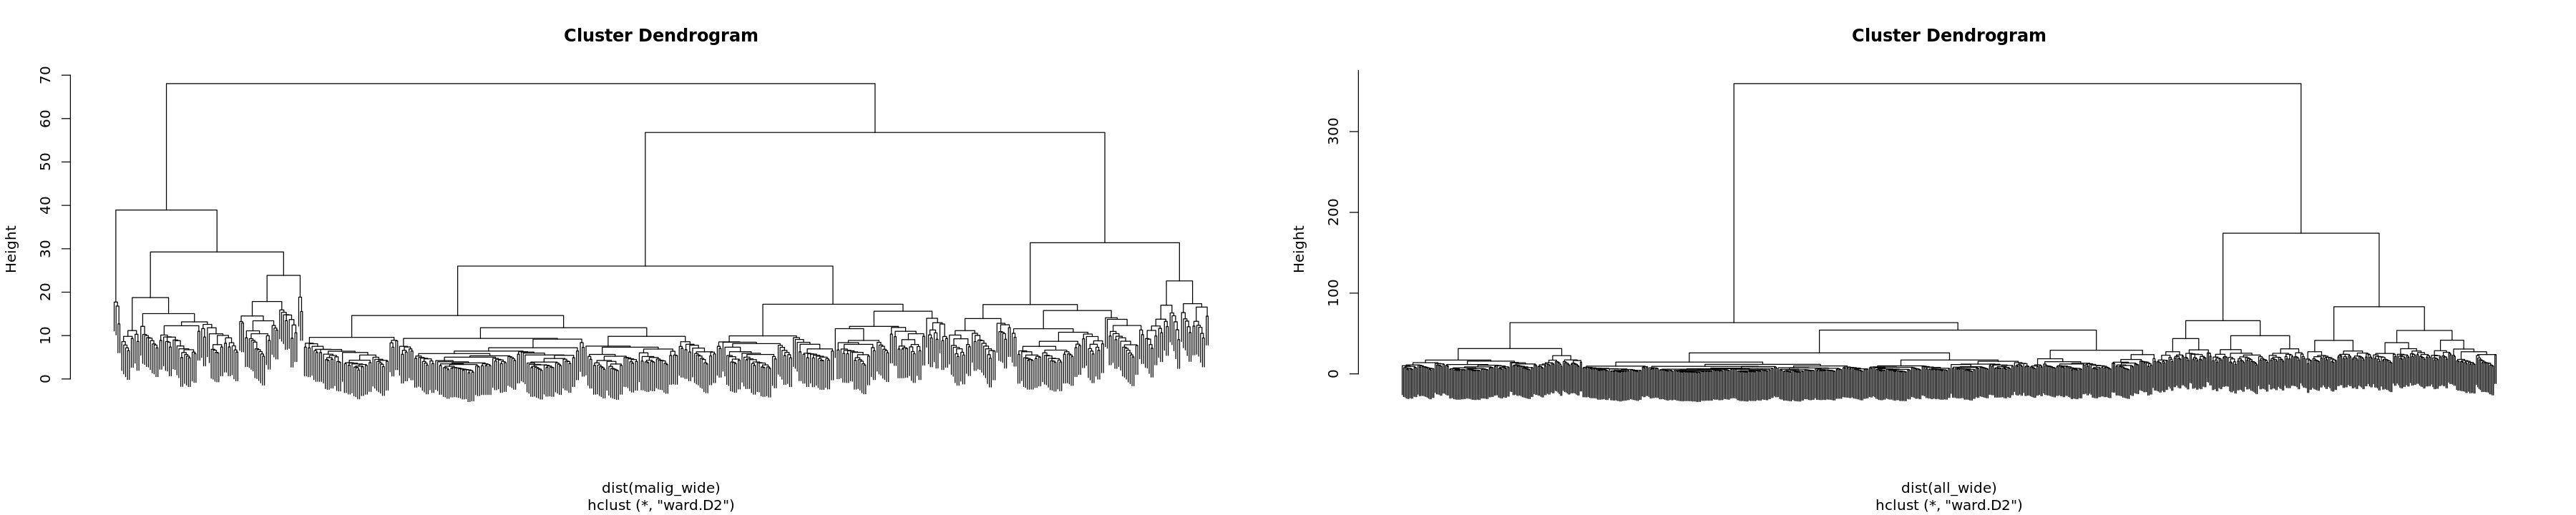

In [41]:
run_slide_cna(sn, 
              md, 
              gene_pos,
              plotDir,
              OUTPUT_DIRECTORY,
              spatial=FALSE)